In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

## Perceptron

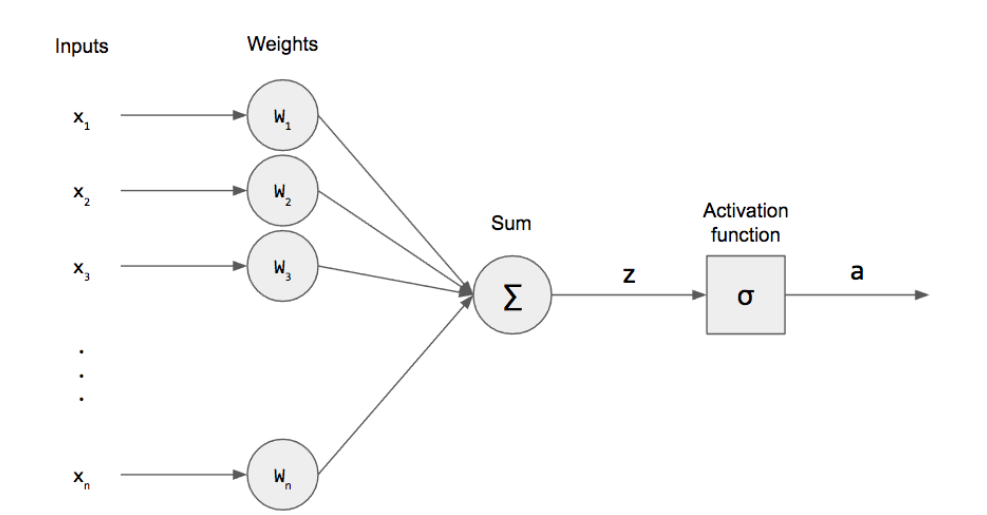

In this model, we have n binary inputs (usually given as a vector) and exactly the same number of weights W_1, ..., W_n. We multiply these together and sum them up. We denote this as z and call it the pre-activation

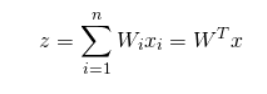

(We can re-write this as an inner product for succinctness.) There is another term, called the bias, that is just a constant factor.

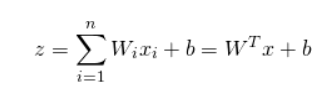

For mathematical convenience, we can actually incorporate it into our weight vector as W_0 and set x_0 = +1 for all of our inputs.

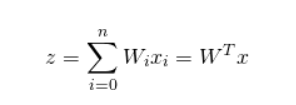

##  learning Algo

## Dataset


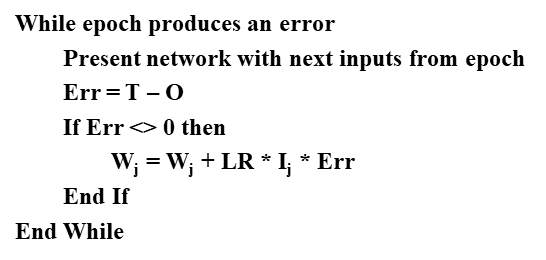

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [ ]:
X.shape, y.shape

## Prepare training data

In [ ]:
# convert class labels to bipolar 
y[y==0] = -1 
# split dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train.resize(y_train.shape[0],1)
y_test.resize(y_test.shape[0],1)

X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

In [ ]:
def sign(a):
    ret = np.full_like(a, 1, dtype=int)
    ret[a > 0] = 1
    ret[a < 0] = -1
    return ret

In [ ]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def initialize(dim):
    w = np.random.rand(2,1)
    b = 0
    return w, b
  


def froward_propagation(w, b, X):
    
    return Sigmoid(np.dot(w.T,X) + b)
  
w, b = initialize(X_train.shape[0])

In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A =  froward_propagation(w, b, X)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    dw = np.dot(X,(A-Y).T)
    db = np.sum(A-Y)/m
    
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def gradient_decent(w, b, X, Y, num_iterations=100, learning_rate=0.009):    
    costs = []
    
    for i in range(num_iterations):    
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    A = froward_propagation(w, b, X)
    
    Y_prediction = np.empty_like(A)
    Y_prediction[A<0.5] = -1
    Y_prediction[A>0.5] = 1
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    w, b = initialize(X_train.shape[0])
    params, grads, costs = gradient_decent(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression_model = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.001)

## Visualize decision boundary

In [ ]:
def plot_seperation(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,1], X[:,0], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.xlim(-8,6); plt.ylim(-8,8);
    plt.show()

In [ ]:
plot_seperation(X_train.T, y_train.T, logistic_regression_model['w'], logistic_regression_model['b'])